Text Classification
4395.001 
Pranay Mantramurti
Saige Wright 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving PostPreQuestionsSmaller (1).csv to PostPreQuestionsSmaller (1).csv


In [ ]:
import sklearn
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('PostPreQuestionsSmaller (1).csv')

df.dropna(inplace = True)
df = df.astype({'label':'category'})
print(df[:5])
df['label'].value_counts()

#2 split train and test target: label, 
Y_train, Y_test, X_train, X_test = train_test_split(df['label'], 
                                                    df['question'], 
                                                    test_size=0.2,
                                                    random_state=1234)


         asin                                           question  \
0  B017PICGL0                           Are boots cold reliable?   
1  B01HI8YEZS                is the main body rubber or plastic?   
2  B07GZ1LF4R   Do you know the thread pitch/count for the tang?   
3  B07BMNPRFN  The item ordered came tarnished and my son nee...   
4  B075QQKFK3  "I purchased these and now they look weird wit...   

                                           item_name  hours_diff label  
0  Reebok Work Men's Zigkick RB7005 Work Shoe, Br...          -1   Pre  
1  3C-Aone Galaxy S5 Case,Mangix Built-in Glass L...          21   Pre  
2  ColdLand |14.00" Hand Forged Damascus Steel Bl...         166  Post  
3  BEICHUANG Beidou 7 Stars Big Dipper Star Penda...         116  Post  
4  Alla Lighting H8 H11 LED Bulbs Xtreme Super Br...        1021  Post  


<BarContainer object of 2 artists>

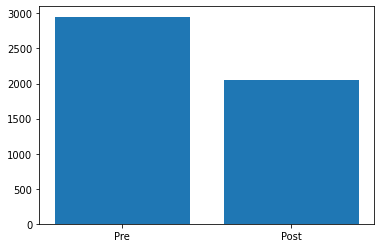

In [ ]:
#creating bar chart distrbution
import matplotlib.pyplot as plt
labels = df['label'].unique()
counts = []
for label in labels:
  counts.append(len(df[df['label'] == label]))
plt.bar(labels,counts)

The data set PrePostQuestions contains 232,492 product questions from 2019-2020, one per line. With columns question, asin, item_name, hours_diff, and label. The model should be able to predict the label of the questions based off the text. Our set that we have running through the code is the first 5000 questions from the original data set put in a smaller cvs file to read from

In [ ]:
y_train_model = Y_train.copy()
y_test_model = Y_test.copy()
x_train_model = X_train.copy()
x_test_model = X_test.copy()

#Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd

# set seed for reproducibility
np.random.seed(1234)

# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
x_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y_train)

temp_train = np.array(Y_train)
temp_test = np.array(Y_test)

y_train = encoder.transform(temp_train)
y_test = encoder.transform(temp_test)

In [ ]:
# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (3997, 25000) (3997,)
test shapes: (1000, 25000) (1000,)
test first five labels: [0 1 1 1 0]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
36/36 [==============================] - 3s 13ms/step - loss: 0.6752 - accuracy: 0.5977 - val_loss: 0.6503 - val_accuracy: 0.6650
Epoch 2/10
36/36 [==============================] - 0s 8ms/step - loss: 0.5646 - accuracy: 0.7843 - val_loss: 0.5824 - val_accuracy: 0.7100
Epoch 3/10
36/36 [==============================] - 0s 8ms/step - loss: 0.4189 - accuracy: 0.8504 - val_loss: 0.5505 - val_accuracy: 0.7275
Epoch 4/10
36/36 [==============================] - 0s 8ms/step - loss: 0.3042 - accuracy: 0.8832 - val_loss: 0.5610 - val_accuracy: 0.7300
Epoch 5/10
36/36 [==============================] - 0s 8ms/step - loss: 0.2273 - accuracy: 0.9224 - val_loss: 0.5886 - val_accuracy: 0.7250
Epoch 6/10
36/36 [==============================] - 0s 9ms/step - loss: 0.1757 - accuracy: 0.9458 - val_loss: 0.6254 - val_accuracy: 0.7150
Epoch 7/10
36/36 [==============================] - 0s 8ms/step - loss: 0.1398 - accuracy: 0.9614 - val_loss: 0.6644 - val_accuracy: 0.6975
Epoch 8/10
36/36 [=

In [ ]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

10/10 [==============================] - 0s 5ms/step - loss: 0.8199 - accuracy: 0.6860
Accuracy:  0.6859999895095825


In [ ]:
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

32/32 [==============================] - 0s 3ms/step
accuracy score:  0.686
precision score:  0.7287066246056783
recall score:  0.7649006622516556
f1 score:  0.7463651050080775


#CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

max_features = 10000
maxlen = 500

x_train = [x.rjust(maxlen) for x in X_train]
x_test = [x.rjust(maxlen) for x in X_test]

temp_train = []
temp_test = []

for val in x_train:
  temp = []
  for letter in val:
    temp.append(ord(letter))
  temp_train.append(temp)

for val in x_test:
  temp = []
  for letter in val:
    temp.append(ord(letter))
  temp_test.append(temp)

x_train = np.array(temp_train)
x_test = np.array(temp_test)

temp_train = []
temp_test = []

for y in Y_train:
  if y == 'Pre':
    temp_train.append(0)
  else:
    temp_train.append(1)

for y in Y_test:
  if y == 'Pre':
    temp_test.append(0)
  else:
    temp_test.append(1)

y_train = np.array(temp_train)
y_test = np.array(temp_test)

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-3),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
predict = []

for x in pred:
  if x == 0:
    predict.append('Pre')
  else:
    predict.append('Post')

print(classification_report(Y_test, predict))

Epoch 1/20
25/25 [==============================] - 1s 15ms/step - loss: 0.7228 - accuracy: 0.5931 - val_loss: 0.6573 - val_accuracy: 0.6450
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.5906 - val_loss: 0.6377 - val_accuracy: 0.6162
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.6203 - val_loss: 0.6326 - val_accuracy: 0.6413
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6439 - accuracy: 0.6700 - val_loss: 0.6277 - val_accuracy: 0.6737
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.6891 - val_loss: 0.6228 - val_accuracy: 0.6825
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6302 - accuracy: 0.7022 - val_loss: 0.6168 - val_accuracy: 0.6787
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6240 - accuracy: 0.7091 - val_loss: 0.6128 - val_accuracy: 0.6938
Epoch 8/20
25/25 [=

#Embeddings

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

max_features = 10000
maxlen = 500

x_train = [x.rjust(maxlen) for x in x_train_model]
x_test = [x.rjust(maxlen) for x in x_test_model]

temp_train = []
temp_test = []

for val in x_train:
  temp = []
  for letter in val:
    temp.append(ord(letter))
  temp_train.append(temp)

for val in x_test:
  temp = []
  for letter in val:
    temp.append(ord(letter))
  temp_test.append(temp)

x_train = np.array(temp_train)
x_test = np.array(temp_test)

temp_train = []
temp_test = []

for y in y_train_model:
  if y == 'Pre':
    temp_train.append(0)
  else:
    temp_train.append(1)

for y in Y_test:
  if y == 'Pre':
    temp_test.append(0)
  else:
    temp_test.append(1)

y_train = np.array(temp_train)
y_test = np.array(temp_test)

##Default Embedding

In [ ]:
#different embedding approaches - Default Approach

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=1e-3),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 0.8395 - accuracy: 0.5812 - val_loss: 0.6636 - val_accuracy: 0.6137
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5812 - val_loss: 0.6563 - val_accuracy: 0.6137
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.5812 - val_loss: 0.6548 - val_accuracy: 0.6137
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.5809 - val_loss: 0.6513 - val_accuracy: 0.6137
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.5821 - val_loss: 0.6493 - val_accuracy: 0.6175
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6610 - accuracy: 0.5830 - val_loss: 0.6461 - val_accuracy: 0.6162
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.5862 - val_loss: 0.6438 - val_accuracy: 0.6187
Epoch 8/20
25/25 [=

##Using Custom Embedding Layer, similar to Github example

In [ ]:
from tensorflow.keras import layers
import keras 

EMBEDDING_DIM = 128
MAX_SEQUENCE_LENGTH = 500

embedding_layer = layers.Embedding(max_features + 1,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(1, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)

model.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
25/25 [==============================] - 12s 25ms/step - loss: 0.6745 - acc: 0.4188 - val_loss: 0.6413 - val_acc: 0.3862
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6518 - acc: 0.4188 - val_loss: 0.6226 - val_acc: 0.3862
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6203 - acc: 0.4188 - val_loss: 0.5875 - val_acc: 0.3862
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5973 - acc: 0.4188 - val_loss: 0.6674 - val_acc: 0.3862
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5859 - acc: 0.4188 - val_loss: 0.5926 - val_acc: 0.3862
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5632 - acc: 0.4188 - val_loss: 0.5688 - val_acc: 0.3862
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5529 - acc: 0.4188 - val_loss: 0.5756 - val_acc: 0.3862
Epoch 8/20
25/25 [==============================] - 0s 8ms/step - loss: 0.5282 - acc: 0.

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
predict = []

for x in pred:
  if x == 0:
    predict.append('Pre')
  else:
    predict.append('Post')

print(classification_report(y_test_model, predict))

32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

        Post       0.40      1.00      0.57       396
         Pre       0.00      0.00      0.00       604

    accuracy                           0.40      1000
   macro avg       0.20      0.50      0.28      1000
weighted avg       0.16      0.40      0.22      1000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analysis: 
Initially our data set was over 230,000 product questions and our models took a long time to train, so we cut the dataset down to about 5,000 product questions. The first sequential model we had an accuracy score of 68% which was surprising but moreover our precision was hgiher at 78%. We took a couple different approaches trying different architecture like CNN, and preprocessing our data different; encoding or values, different activation functions, and embedding matrices. After attempting alternate embedding formats, it ended up being incompatible with our dataset, or didn't make much of a difference,  overall the CNN was best.